# Neural networks in PyTorch
Based on [this tutorial](https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html).

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [6]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
    
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [19]:
params = list(net.parameters())
print(len(params))
# print(params[0].size())  # conv1's weight tensor

print('Conv1 weights:', params[0].size())
print('Conv1 biases:', params[1].size())
print('Conv2 weights:', params[2].size())
print('Conv2 biases:', params[3].size())
print('FC1 weights:', params[4].size())
print('FC1 biases:', params[5].size())
print('FC2 weights:', params[6].size())
print('FC2 biases:', params[7].size())
print('FC3 weights:', params[8].size())
print('FC3 biases:', params[9].size())

10
Conv1 weights: torch.Size([6, 1, 5, 5])
Conv1 biases: torch.Size([6])
Conv2 weights: torch.Size([16, 6, 5, 5])
Conv2 biases: torch.Size([16])
FC1 weights: torch.Size([120, 400])
FC1 biases: torch.Size([120])
FC2 weights: torch.Size([84, 120])
FC2 biases: torch.Size([84])
FC3 weights: torch.Size([10, 84])
FC3 biases: torch.Size([10])


In [35]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[ 0.0256, -0.0645,  0.1951, -0.0061,  0.0233,  0.1118, -0.0627,  0.0897,
          0.0557, -0.0371]], grad_fn=<ThAddmmBackward>)


In [36]:
net.zero_grad()
out.backward(torch.randn(1, 10))

In [37]:
print(net.fc1.weight.grad.sum())
print(net.fc1.weight.grad.shape)

tensor(-91.2481)
torch.Size([120, 400])


In [41]:
input = torch.randn(1, 1, 32, 32)
output = net(input)
target = torch.randn(10)
target = target.view(1, -1)
criterion = nn.MSELoss()
loss = criterion(output, target)
print(loss)

tensor(1.8124, grad_fn=<MseLossBackward>)


In [43]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

In [44]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([-0.0079, -0.0071,  0.0375,  0.0055, -0.0505, -0.0220])


In [45]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [47]:
import torch.optim as optim
optimizer = optim.SGD(net.parameters(), lr=0.01)
n_epochs = 10

for i in range(1, n_epochs + 1):
    optimizer.zero_grad()
    output = net(input)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()

### Full example with CIFAR10

In [52]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./datasets/cifar10', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./datasets/cifar10', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


torch.Size([3, 36, 138])
 ship   dog plane truck


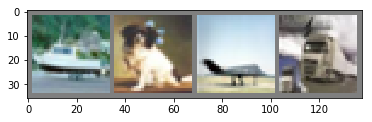

In [56]:
import matplotlib.pyplot as plt
import numpy as np

def show(img):
    print(img.shape)
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
               
dataiter = iter(trainloader)
images, labels = next(dataiter)
               
show(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [57]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [59]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [64]:
n_epochs = 2

for epoch in range(1, n_epochs + 1):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if (i + 1) % 1000 == 0: # Every 1000 mini-batches
            print('[Epoch %d, mini-batch %5d] loss: %.3f' %
                  (epoch, i + 1, running_loss))
            running_loss = 0.0
        
print('Done')

[Epoch 1, mini-batch  1000] loss: 1214.617
[Epoch 1, mini-batch  2000] loss: 1217.717
[Epoch 1, mini-batch  3000] loss: 1228.434
[Epoch 1, mini-batch  4000] loss: 1207.365
[Epoch 1, mini-batch  5000] loss: 1220.523
[Epoch 1, mini-batch  6000] loss: 1204.979
[Epoch 1, mini-batch  7000] loss: 1201.625
[Epoch 1, mini-batch  8000] loss: 1202.647
[Epoch 1, mini-batch  9000] loss: 1181.741
[Epoch 1, mini-batch 10000] loss: 1189.365
[Epoch 1, mini-batch 11000] loss: 1158.782
[Epoch 1, mini-batch 12000] loss: 1184.892
[Epoch 2, mini-batch  1000] loss: 1119.845
[Epoch 2, mini-batch  2000] loss: 1111.494
[Epoch 2, mini-batch  3000] loss: 1098.584
[Epoch 2, mini-batch  4000] loss: 1078.409
[Epoch 2, mini-batch  5000] loss: 1128.833
[Epoch 2, mini-batch  6000] loss: 1080.909
[Epoch 2, mini-batch  7000] loss: 1118.590
[Epoch 2, mini-batch  8000] loss: 1115.781
[Epoch 2, mini-batch  9000] loss: 1119.183
[Epoch 2, mini-batch 10000] loss: 1096.210
[Epoch 2, mini-batch 11000] loss: 1088.738
[Epoch 2, m

torch.Size([3, 36, 138])
GroundTruth:    cat  ship  ship plane
Predicted:    cat  ship truck plane


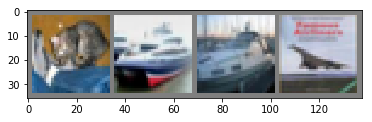

In [68]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
show(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
outputs = net(images)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [69]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 58 %


In [72]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 52 %
Accuracy of   car : 57 %
Accuracy of  bird : 26 %
Accuracy of   cat : 36 %
Accuracy of  deer : 71 %
Accuracy of   dog : 50 %
Accuracy of  frog : 72 %
Accuracy of horse : 62 %
Accuracy of  ship : 82 %
Accuracy of truck : 72 %
